# Assignment 9 - Multiple Linear Regression

## Problem statement 2
An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve their objective by applying multilinear regression on the given dataset. Please use the below columns for the analysis purpose: price, age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, and Weight.

## 1. Business Problem

1.1 What is the business objective?
- Build a Multiple Linear Regression model to predict the price of a car using features like age, KM driven, HP, cc, Doors, Gears, Quarterly Tax, and Weight.

- Analyze which features significantly affect car pricing.

- Evaluate model performance using RMSE, R-squared, and tune the model if necessary.

- Provide the platform with an automated pricing model for buyers and sellers.

1.2 Are there any constraints?
- The dataset may contain multicollinearity among numerical features.

- Assumes linear relationships between predictors and price.

- Data might have missing values or outliers that can affect predictions.

- Model interpretability could be limited without proper feature scaling or transformation.



## 2. Data dictionary
![Screenshot 2025-04-11 011644.png](<attachment:Screenshot 2025-04-11 011644.png>)
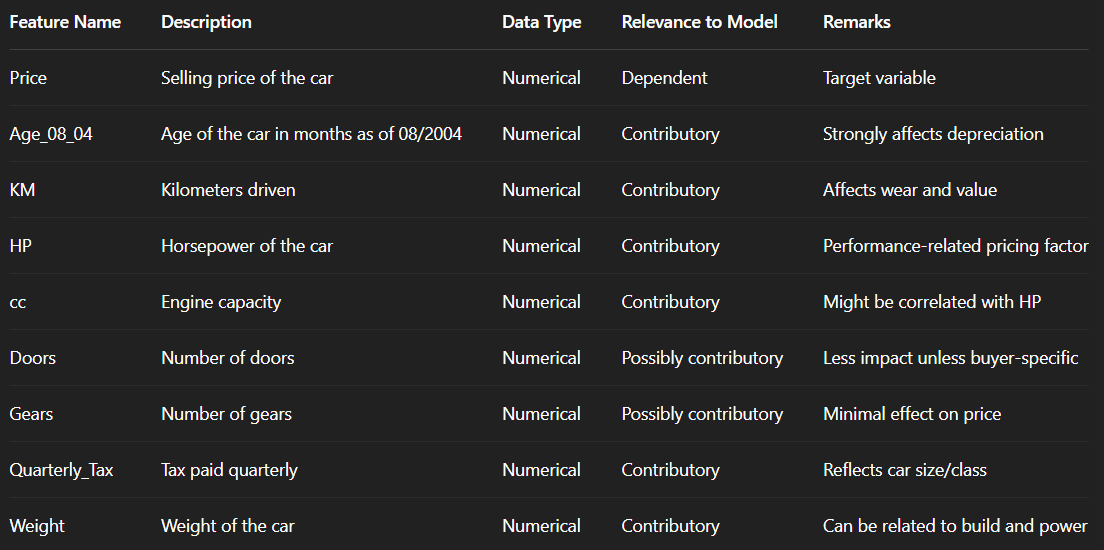

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("ToyotaCorolla.csv",encoding_errors='ignore')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## 3. Data preprocessing

In [5]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [6]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
#Columns to keep
columns_to_keep=["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]

#Keep only the specified columns
df=data[columns_to_keep]

boxplot of Price


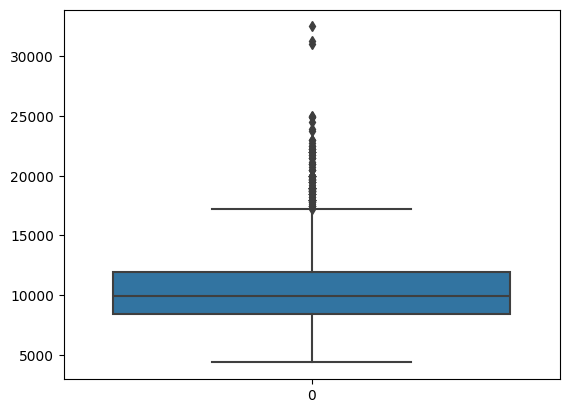

boxplot of Age_08_04


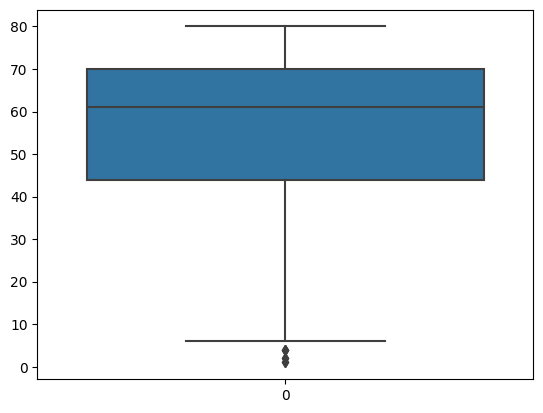

boxplot of KM


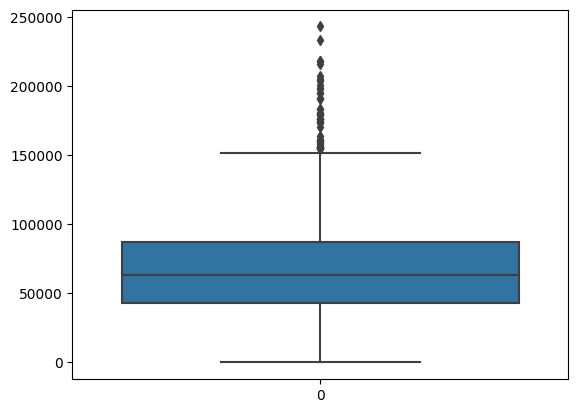

boxplot of HP


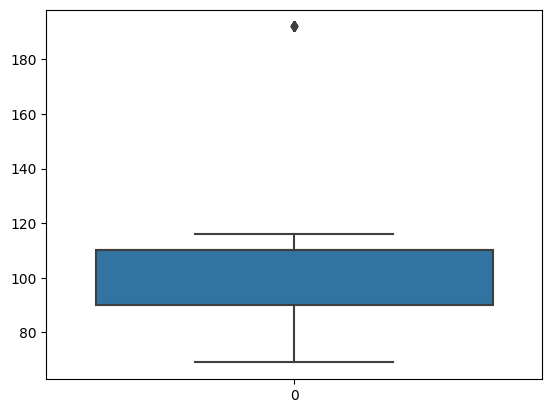

boxplot of cc


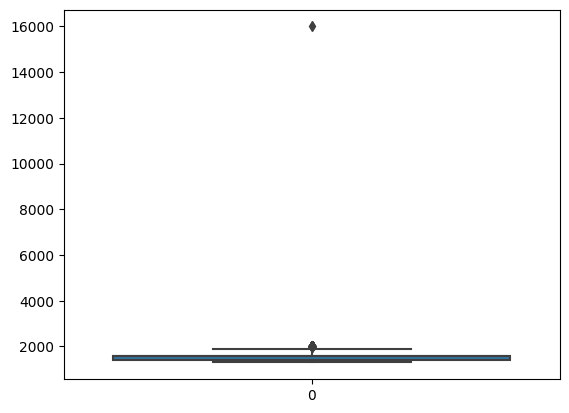

boxplot of Doors


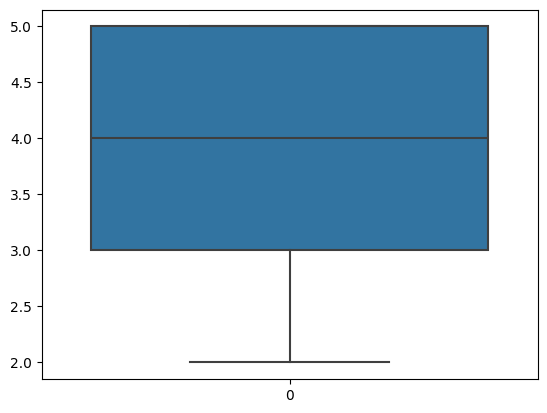

boxplot of Gears


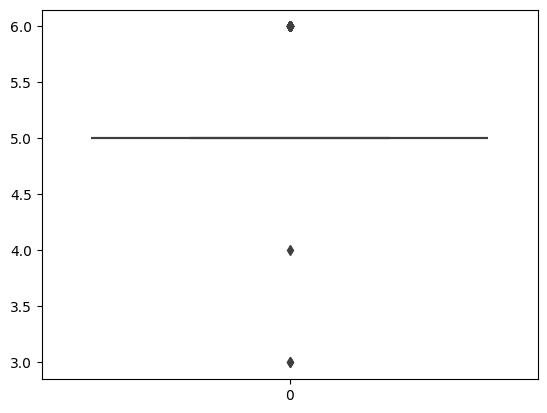

boxplot of Quarterly_Tax


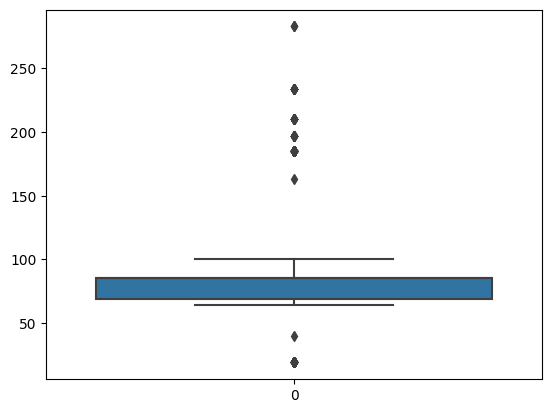

boxplot of Weight


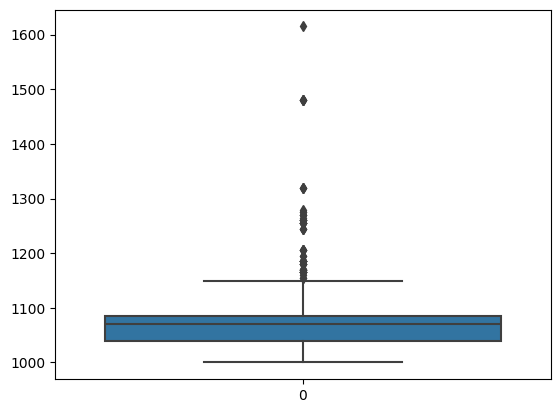

In [13]:
# Check for outliers
for i in columns_to_keep:
    sns.boxplot(df[i])
    print(f'boxplot of {i}')
    plt.show()

(<Axes: >, (1436, 9))

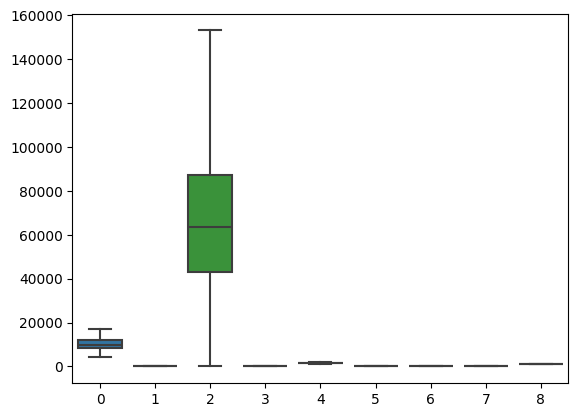

In [14]:
#Now outlier Treatment using replacement technique

IQR=df.quantile(0.75)-df.quantile(0.25)
IQR
lower_limit=df.quantile(0.25)-1.5*IQR
upper_limit=df.quantile(0.75)+1.5*IQR
IQR,lower_limit,upper_limit

df_replaced=pd.DataFrame(np.where(df>upper_limit,upper_limit,np.where(df<lower_limit,lower_limit,df)))

In [16]:
df_replaced.head()

,0,1,2,3,4,5,6,7,8
0,13500.0,23.0,46986.0,90.0,1900.0,3.0,5.0,109.0,1152.5
1,13750.0,23.0,72937.0,90.0,1900.0,3.0,5.0,109.0,1152.5
2,13950.0,24.0,41711.0,90.0,1900.0,3.0,5.0,109.0,1152.5
3,14950.0,26.0,48000.0,90.0,1900.0,3.0,5.0,109.0,1152.5
4,13750.0,30.0,38500.0,90.0,1900.0,3.0,5.0,109.0,1152.5


In [18]:
df_replaced.columns=df.columns

boxplot of Price


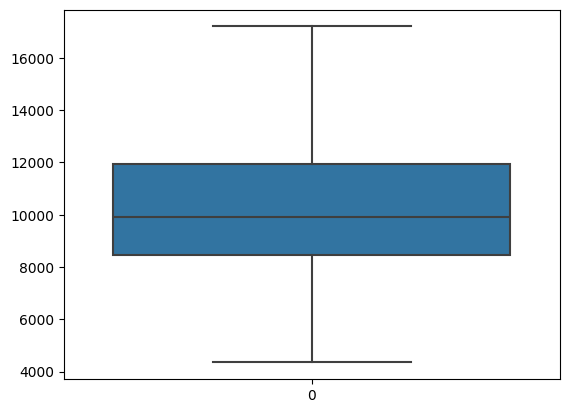

boxplot of Age_08_04


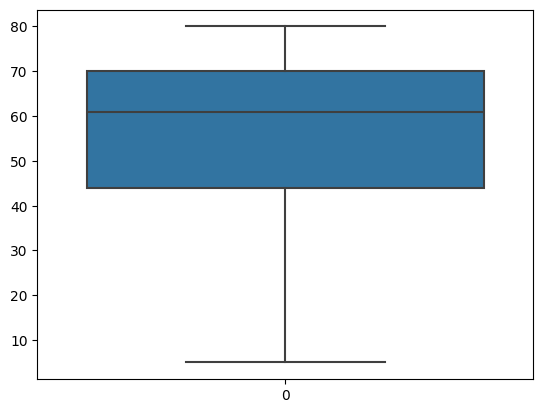

boxplot of KM


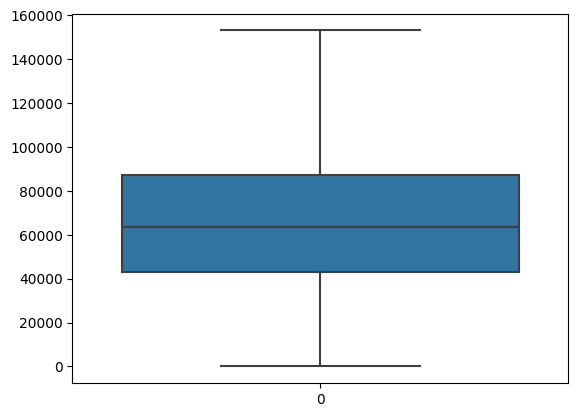

boxplot of HP


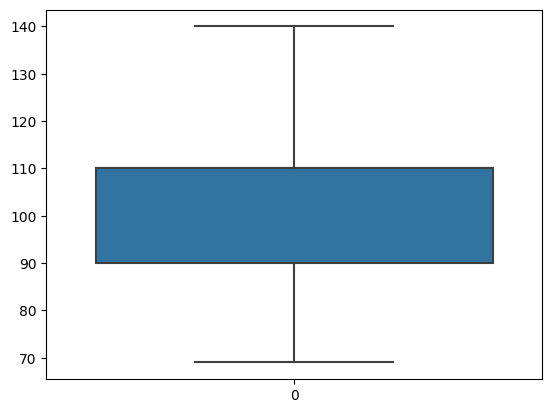

boxplot of cc


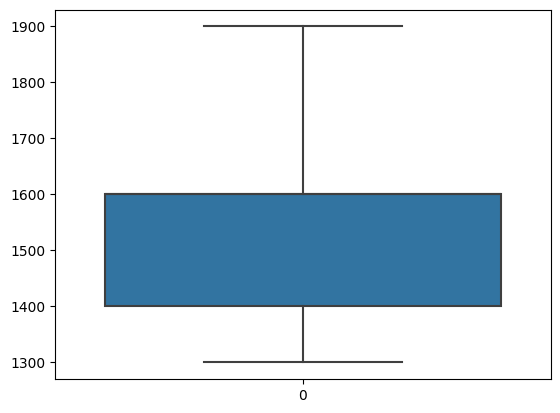

boxplot of Doors


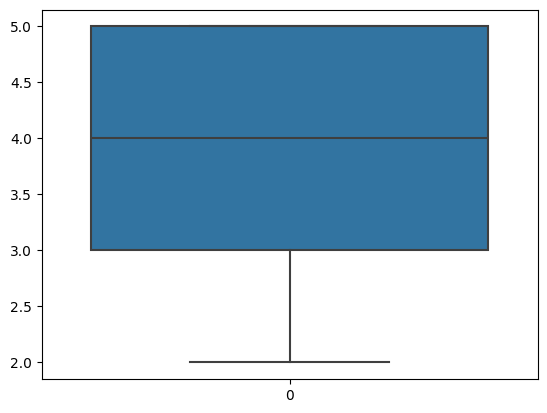

boxplot of Gears


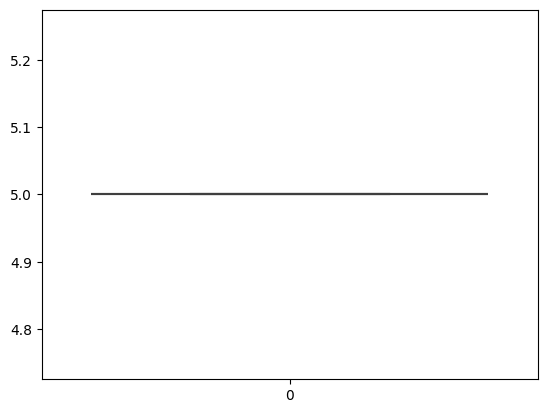

boxplot of Quarterly_Tax


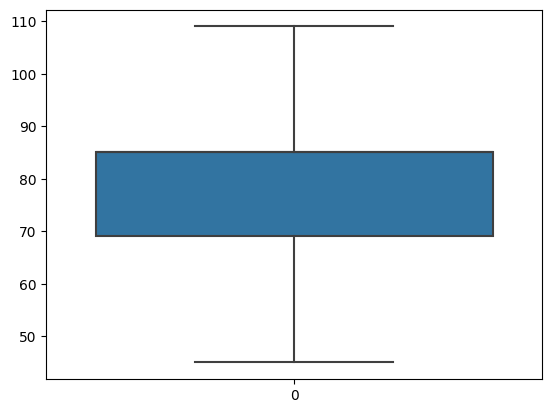

boxplot of Weight


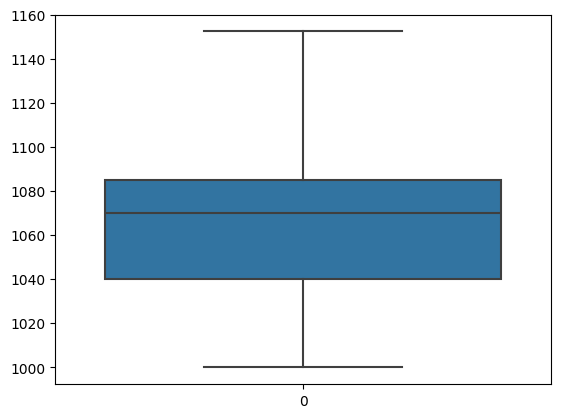

In [19]:
# Check for outliers
for i in df_replaced.columns:
    sns.boxplot(df_replaced[i])
    print(f'boxplot of {i}')
    plt.show()

In [20]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [21]:
data=df

## 4. EDA

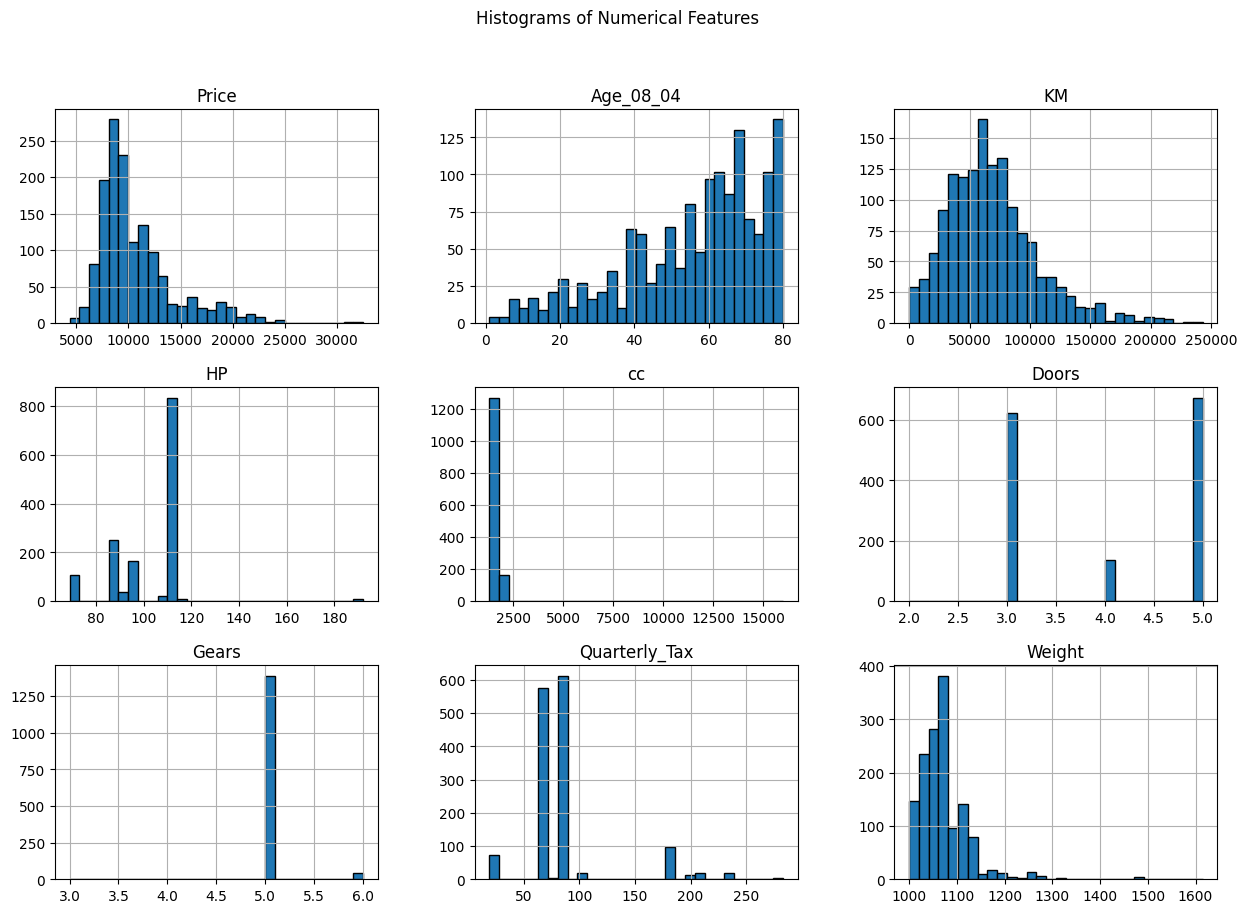

In [22]:
# Univariate Analysis
data.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

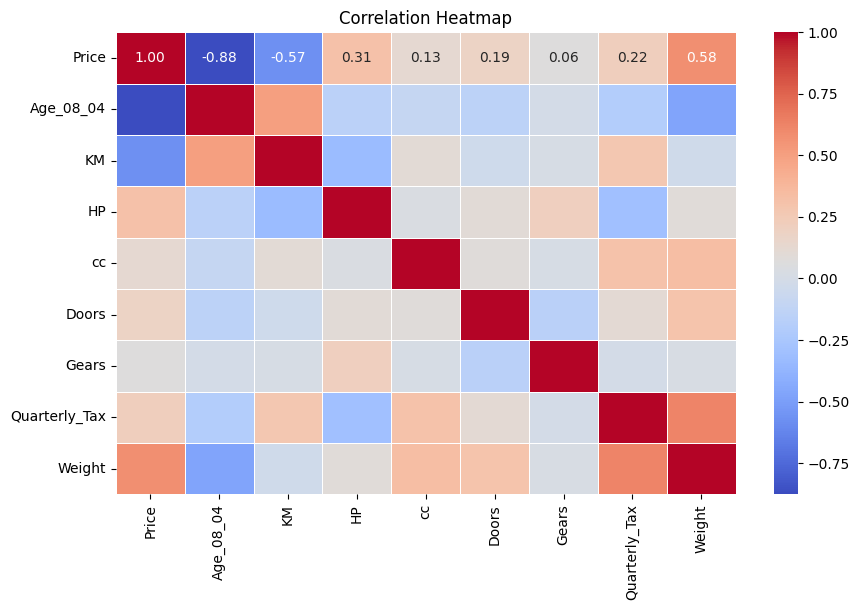

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 5.Model building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [24]:
#Define Features (X) and Target (y)
X=df.drop(columns=["Price"])  # Independent variables
y=df["Price"]  # Dependent variable

In [25]:
#Split data into Train & Test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Build Multilinear Regression Model
model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
#Predictions
y_pred=model.predict(X_test)


In [29]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

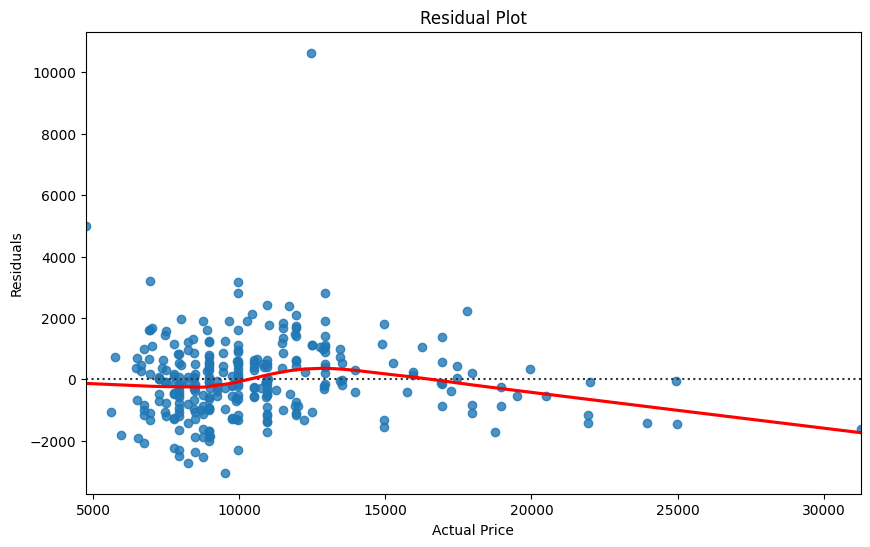

In [30]:
# Diagnostic Plots
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [31]:
# Display Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 995.59
Mean Squared Error (MSE): 1950244.99
Root Mean Squared Error (RMSE): 1396.51
R-Squared (R²): 0.85


In [32]:
#Model Tuning (Regularization)
#Ridge Regression (L2 Regularization)
ridge=Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))


In [33]:
#Lasso Regression (L1 Regularization)
lasso=Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))

#Compare Models
print("\nModel Comparison:")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")


Model Comparison:
Linear Regression RMSE: 1396.51
Ridge Regression RMSE: 1396.56
Lasso Regression RMSE: 1396.52


         Feature  Coefficient  Absolute Coefficient
5          Gears   566.402069            566.402069
0      Age_08_04  -119.692339            119.692339
2             HP    28.521533             28.521533
7         Weight    19.363926             19.363926
4          Doors     5.573234              5.573234
6  Quarterly_Tax     1.427170              1.427170
3             cc    -0.108497              0.108497
1             KM    -0.020761              0.020761


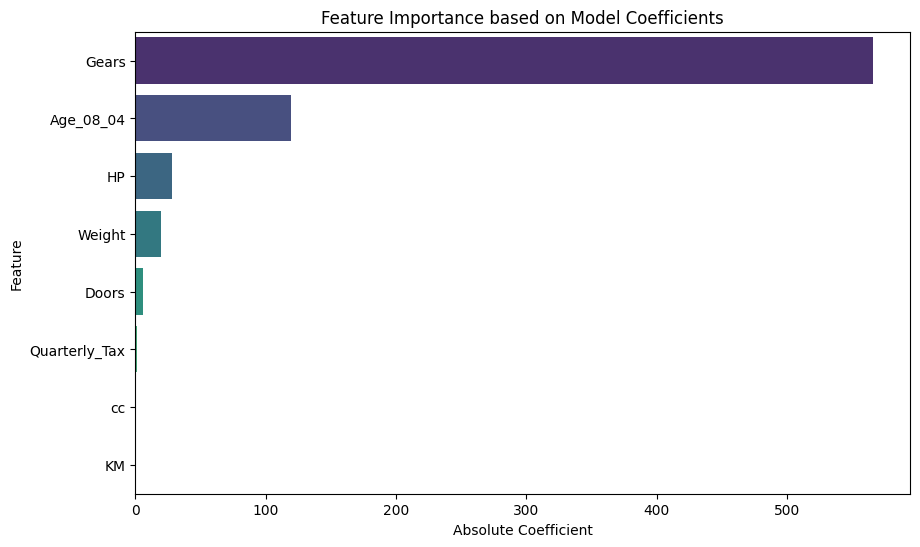

In [34]:
#Checking model coefficients and feature importance
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients["Absolute Coefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="Absolute Coefficient", ascending=False)
print(coefficients)

#Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Absolute Coefficient", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance based on Model Coefficients")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()

## 6. Benefits of the solution
- Accurate Pricing Guidance: The model helps buyers and sellers get a fair and data-driven estimate of a car's value, improving trust and transparency on the platform.

- Faster Transactions: Automated price predictions reduce negotiation time, making the buying/selling process quicker and more efficient for users.